# Get images from cameras

Reachy 2 has 2 types of camera:

- the **teleop** cameras, with a right and left cameras, located in Reachy 2’s head and used for the teleoperation
- the **SR** camera, which is a depth camera, located in Reachy 2’s torso and mainly useful for manipulation tasks

Each camera can be accessed separately through reachy.cameras. They both have a right and left view, with the left and right sides considered from Reachy point of view. To be able to specify the view you want to get a frame from, you will need to import CameraView:

```python
from reachy2_sdk.media.camera import CameraView
```

## Enable teleop cameras for the SDK

The teleop cameras are shared between the teleop service and the SDK server, and can only be used by one at the same time.
In order to be able to use the teleop cameras with the SDK:

1. Go to the dashboard
2. Stop webrtc service in the services tab

## Plug SR camera

Plug the SR camera in the back of the computer! They should be unplugged by default.

In [1]:
from reachy2_sdk import ReachySDK
import time

## Get images

First, connect to your robot.  
**Do not forget to import the CameraView!**

In [2]:
from reachy2_sdk import ReachySDK
from reachy2_sdk.media.camera import CameraView


reachy = ReachySDK(host='localhost')  # Replace with the actual IP

Check the list of initialized cameras:

In [3]:
reachy.cameras

<CameraManager intialized_cameras=
	<Camera name="teleop" stereo=True> 
>

The list of initialized cameras should contain both the teleop and SR camera.  

For each camera, namely the teleop and the SR ones, you must call the `capture()`function each time you want to get an image. This captures an image from both view of the given camera at the same time. You can then access one of the image with the `get_frame()` method.

### Teleop cameras

To get both views of the robot teleop cameras:

In [10]:
l_frame, l_ts = reachy.cameras.teleop.get_frame(CameraView.LEFT)
r_frame, r_ts = reachy.cameras.teleop.get_frame(CameraView.RIGHT)

We can print the timestamp of each frame (in nanosecond)

In [16]:
print(f"timestamp left frame {l_ts} - timestamp right frame {r_ts}")

timestamp left frame 1721914903226537808 - timestamp right frame 1721914903239855393


Let's display the captured frame with PIL:

In [11]:
from PIL import Image

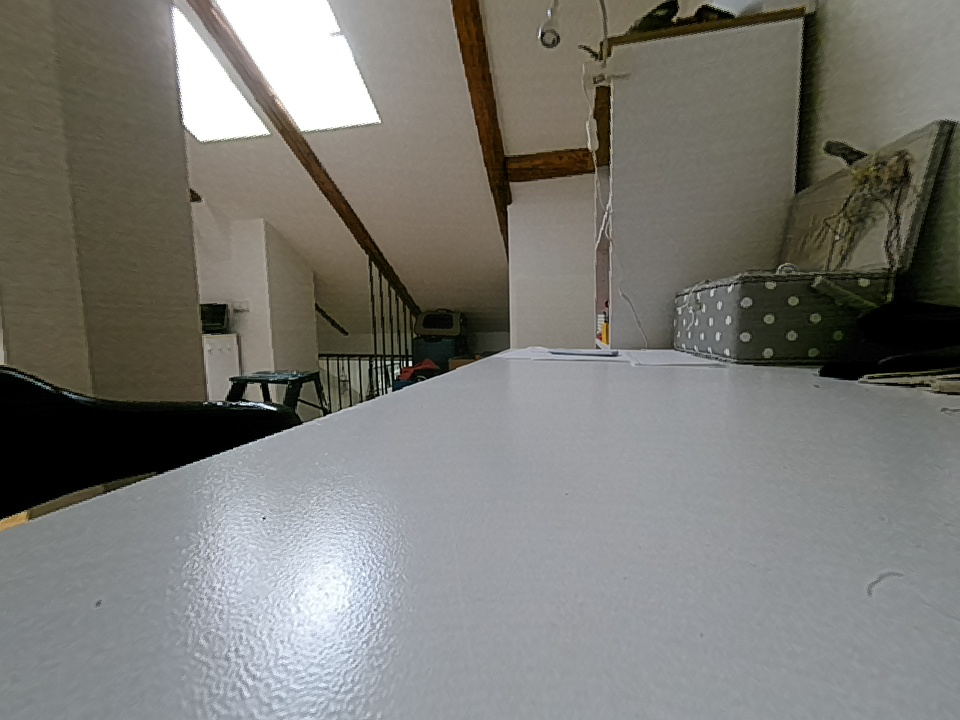

In [12]:
Image.fromarray(l_frame[:,:,::-1])

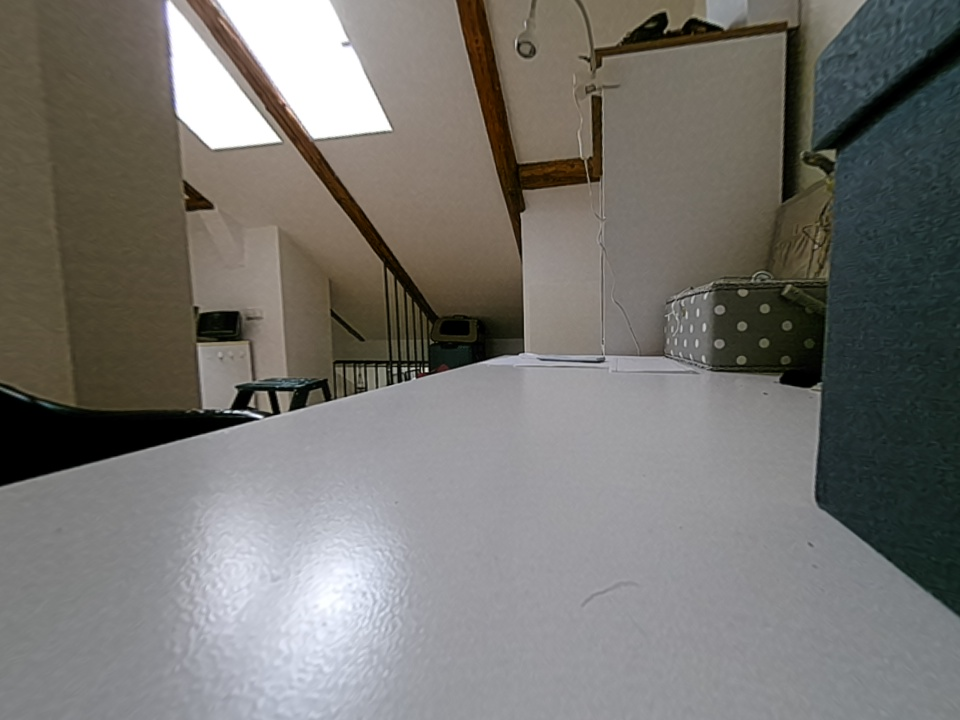

In [14]:
Image.fromarray(r_frame[:,:,::-1])

The camera parameters, as defined [here](https://docs.ros.org/en/melodic/api/sensor_msgs/html/msg/CameraInfo.html), are also available

In [20]:
height, width, distortion_model, D, K, R, P =  reachy.cameras.teleop.get_parameters(CameraView.LEFT)
print(f"height: {height}")
print(f"width: {width}")
print(f"distortion model: {distortion_model}")
print(f"distortion coefficients {D}")
print(f"instrinsic matrix {K}")
print(f"rectification matrix {R}")
print(f"projection matrix {P}")

height: 720


### SR cameras

The SR camera works exactly the same as the teleop camera, but you have more elements captured. In fact, it a RGBD camera, so you have both access to the RGB images and depth information.



#### RGB images

Getting RGB images from the SR camera looks the same as from the teleop one: after having called `capture()`, use `get_frame()` specifying the CameraView you want to get.

In [ ]:
# First call the capture()
reachy.cameras.SR.capture()

# Then get the desired frames
l_frame = reachy.cameras.SR.get_frame(CameraView.LEFT)
r_frame = reachy.cameras.SR.get_frame(CameraView.RIGHT)

Let's display the captured frame with PIL:

In [ ]:
from PIL import Image

In [ ]:
Image.fromarray(l_frame[:,:,::-1])

In [ ]:
Image.fromarray(r_frame[:,:,::-1])

#### Depth information

The SR camera is a depth camera, you can then diplay a left or right **depth frame** using `get_depth_frame()`, but also the **depthmap** and the **disparity**.   

You first have to capture all, then you can read the frame and get the information you want:

In [ ]:
# First call the capture()
reachy.cameras.SR.capture()

# Then retrieve the desired frames
l_depth_frame = reachy.cameras.SR.get_depth_frame(CameraView.LEFT)
r_depth_frame = reachy.cameras.SR.get_depth_frame(CameraView.RIGHT)
depth = reachy.cameras.SR.get_depthmap()
disparity = reachy.cameras.SR.get_disparity()

Let's display the captured frame with PIL:

In [ ]:
from PIL import Image

In [ ]:
Image.fromarray(l_depth_frame[:,:])

In [ ]:
Image.fromarray(r_depth_frame[:,:])

In [ ]:
Image.fromarray(depth)

In [ ]:
Image.fromarray(disparity)

## Live stream

Although we provide an optimal way to get the video stream, it is still possible to display what Reachy see through the SDK. It could be useful to feed a compute vision algorithm that do not need to run at high frequency.

This is demonstrate in a decicated script : [cameras.py](cameras.py)